# Important Library for classification model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\My PC\\Desktop\\Carrier-assignment'

# load the training dataset

In [3]:
df = pd.read_csv('2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv')

In [4]:
df

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0
...,...,...,...,...,...,...,...,...,...
795,26,161,28.4,90,78,0.5578,42,3,0
796,37,165,33.7,60,0,0.3078,69,6,1
797,27,166,25.6,74,0,0.2638,0,5,0
798,109,139,28.1,66,94,0.2298,53,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


In [6]:
df.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [7]:
df.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [8]:
c = [ 'bmi', 'blood_pressure','insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']
c

['bmi',
 'blood_pressure',
 'insulin_test',
 'liver_stress_test',
 'cardio_stress_test',
 'years_smoking']

# Some features like bmi, insulin and blood pressure have zero values, that cannot be zero, so trying to replace it with mean values witout zero 

In [9]:
np.mean(df['bmi']!=0)

0.98625

In [10]:
for j in c:
    replace_value = np.mean(df[j]!=0)
    df[j] = df[j].replace(0,replace_value)

In [11]:
df

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80.0,0.5375,1.5038,0.71625,10.0000,0
1,23,150,38.5,68.0,71.0000,0.3868,55.00000,2.0000,0
2,47,186,29.9,90.0,0.5375,0.2728,0.71625,7.0000,0
3,18,150,30.8,70.0,1033.0000,0.6598,56.00000,0.8575,0
4,24,160,32.4,74.0,125.0000,0.7608,59.00000,2.0000,0
...,...,...,...,...,...,...,...,...,...
795,26,161,28.4,90.0,78.0000,0.5578,42.00000,3.0000,0
796,37,165,33.7,60.0,0.5375,0.3078,69.00000,6.0000,1
797,27,166,25.6,74.0,0.5375,0.2638,0.71625,5.0000,0
798,109,139,28.1,66.0,94.0000,0.2298,53.00000,1.0000,0


In [12]:
df.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.215186,69.606836,86.136094,0.544496,43.324486,4.173444,0.348750
std,13.824025,31.942438,8.498635,19.728594,126.164610,0.348711,30.121751,4.066826,0.476873
min,18.000000,94.000000,0.986250,0.956250,0.537500,0.140800,0.716250,0.857500,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.537500,0.307800,0.716250,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


As per data set the no null value hence cleaning is not required

# Outlier Treatment

In [13]:
def remove_outlier_by_mean_value(df , col_in):
    q1 = df[col_in].quantile(0.25)
    q3 = df[col_in].quantile(0.75)
    value = df[col_in].mean()
    iqr = q3-q1
    x = list(df[col_in])
    y = []
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    for i in x:
        if (i < fence_low) or (i > fence_high):
            i = value
            y.append(i)
        else:
            y.append(i)
    df.drop(col_in,axis=1,inplace=True)
    df[col_in] = y

In [15]:
for i in df.columns[:-1]:
    remove_outlier_by_mean_value(df,i)

# Exploratory Data Analysis

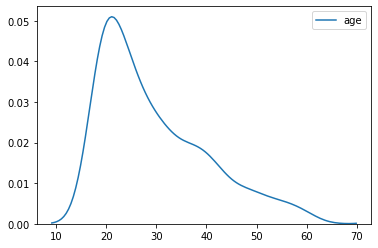

In [16]:
sns.kdeplot(df['age'])

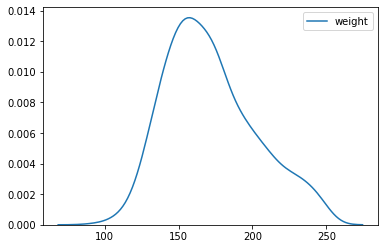

In [17]:
sns.kdeplot(df['weight'])

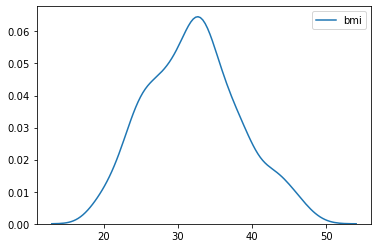

In [18]:
sns.kdeplot(df['bmi'])

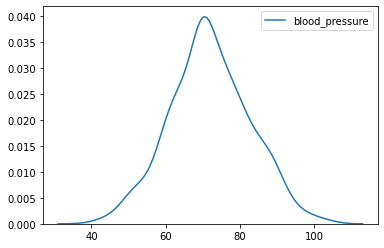

In [19]:
sns.kdeplot(df['blood_pressure'])

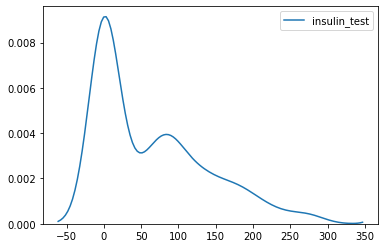

In [20]:
sns.kdeplot(df['insulin_test'])

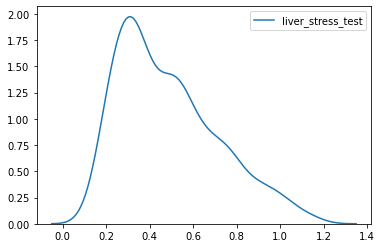

In [21]:
sns.kdeplot(df['liver_stress_test'])

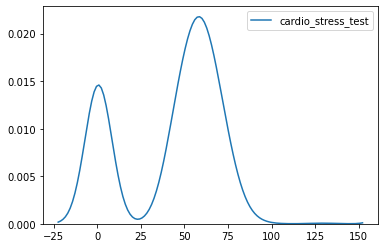

In [22]:
sns.kdeplot(df['cardio_stress_test'])

# cardio_stress_test not follwing normal distribution

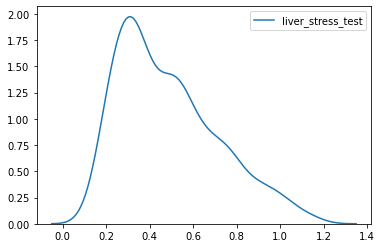

In [23]:
sns.kdeplot(df['liver_stress_test'])

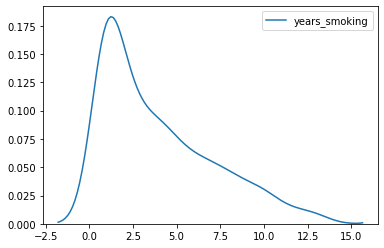

In [24]:
sns.kdeplot(df['years_smoking'])

# Checking data separation

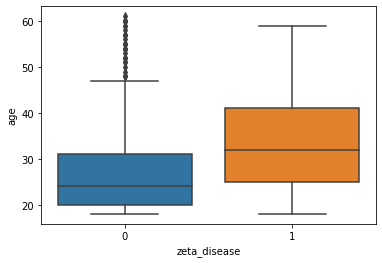

In [26]:
sns.boxplot(y=df['age'],x='zeta_disease',data=df)

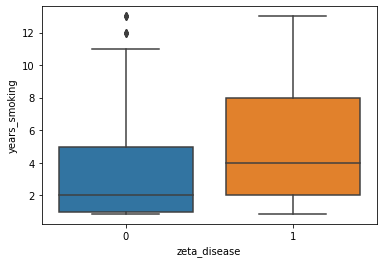

In [27]:
sns.boxplot(y=df['years_smoking'],x='zeta_disease',data=df)

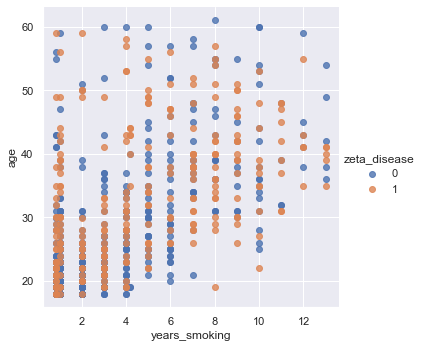

In [28]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df, x='years_smoking', y='age', hue='zeta_disease',
                   fit_reg=False, legend=True, legend_out=True)

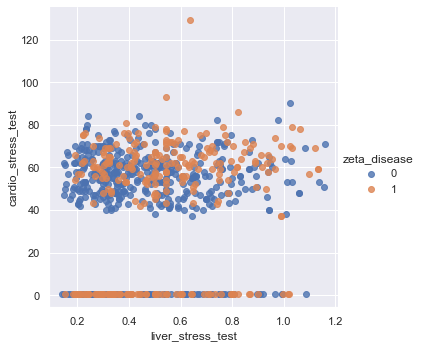

In [29]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df, x='liver_stress_test', y='cardio_stress_test', hue='zeta_disease',
                   fit_reg=False, legend=True, legend_out=True)

# Checking Correlation - it helps in find best variable for the model

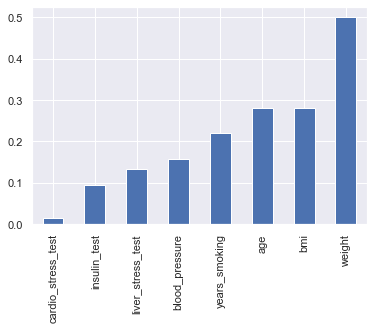

In [30]:
x= df.corr()['zeta_disease']
x.sort_values()[:-1].plot.bar()

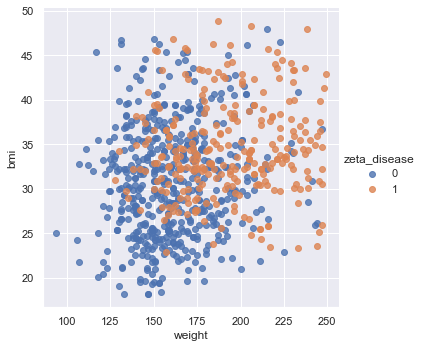

In [31]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df, x='weight', y='bmi', hue='zeta_disease',
                   fit_reg=False, legend=True, legend_out=True)

# Creating train and test dataset 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop('zeta_disease',axis=1)
y = df['zeta_disease']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

# Neural Network Clssification Model

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
Classifier = MLPClassifier(hidden_layer_sizes=(150,100,100),activation='relu',max_iter=10000)

In [37]:
Classifier.fit(X_train,y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(150, 100, 100), max_iter=10000)

In [38]:
predictions = Classifier.predict(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
print(accuracy_score(y_test,predictions))

0.6958333333333333


In [41]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[99 53]
 [20 68]]
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       152
           1       0.56      0.77      0.65        88

    accuracy                           0.70       240
   macro avg       0.70      0.71      0.69       240
weighted avg       0.73      0.70      0.70       240



# Random Forest Classiciation Model

In [42]:
model = RandomForestClassifier(n_estimators=10)

In [43]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [44]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [45]:
y_pred = model.predict(X_test)

In [46]:
print(accuracy_score(y_test,y_pred))

0.7083333333333334


# XGBoost Classification Model

In [47]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic')
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_pred = xgb_model.predict(X_test)

In [49]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.75
[[125  27]
 [ 33  55]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       152
           1       0.67      0.62      0.65        88

    accuracy                           0.75       240
   macro avg       0.73      0.72      0.73       240
weighted avg       0.75      0.75      0.75       240



In [50]:
feature_cols = ['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'years_smoking']
X = df[feature_cols] # Features
y = df.zeta_disease # Target variable

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

# Logistic Regression 

In [52]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# pred
y_pred=logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[127,  16],
       [ 42,  55]], dtype=int64)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7583333333333333
Precision: 0.7746478873239436
Recall: 0.5670103092783505


# Prediction for New Data

In [55]:
pridiction_data = pd.read_csv('2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv')

In [56]:
pridiction_data = pridiction_data.iloc[:,:-1]
pridiction_data = pridiction_data[feature_cols]
pridiction_data

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,years_smoking
0,24,151,39.5,69,72,1.3968,4
1,27,179,35.5,89,156,1.6608,6
2,34,147,26.9,76,74,1.6958,2
3,35,206,32.4,73,127,1.4608,6
4,60,193,29.8,62,192,1.7798,9
5,45,120,36.5,108,50,1.2978,12
6,20,139,38.2,61,77,1.5818,3
7,23,137,31.2,70,73,1.4168,7
8,36,195,30.5,59,141,1.4498,6
9,19,193,25.8,84,66,1.7938,3


In [57]:
y_pred=logreg.predict(pridiction_data)

In [58]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [59]:
pridiction_data['zeta_disease'] = list(y_pred)

In [60]:
pridiction_data

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,4,0
1,27,179,35.5,89,156,1.6608,6,0
2,34,147,26.9,76,74,1.6958,2,0
3,35,206,32.4,73,127,1.4608,6,1
4,60,193,29.8,62,192,1.7798,9,1
5,45,120,36.5,108,50,1.2978,12,0
6,20,139,38.2,61,77,1.5818,3,0
7,23,137,31.2,70,73,1.4168,7,0
8,36,195,30.5,59,141,1.4498,6,1
9,19,193,25.8,84,66,1.7938,3,0


In [61]:
pridiction_data.to_csv('disease_predicted_dataset.csv')

# Tried different methods, logistic regression model performs better and it is used for prediction to detect Zeta disease from new dataset. Some variable not following normality are dropped from the model.